# Import python packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

# Import and Clean the Data

In [3]:
# %load "data_wrangling.py"


df_sp500 = pd.read_csv('data/S&P500.csv')

#Column selection
df_sp500 = df_sp500[['Date','Open', 'Close', 'Adj Close']]

#Dropping NaN values
df_sp500.dropna(axis=0, inplace=True)

#Converting dates from string to datetime
df_sp500['Date'] = pd.to_datetime(df_sp500.Date)
df_sp500.shape

(17441, 4)

# Check Head of Dataframe

In [4]:
df_sp500.head()

,Date,Open,Close,Adj Close
0,1950-01-03,16.66,16.66,16.66
1,1950-01-04,16.85,16.85,16.85
2,1950-01-05,16.93,16.93,16.93
3,1950-01-06,16.98,16.98,16.98
4,1950-01-09,17.08,17.08,17.08


# Describe the data

In [5]:
df_sp500.describe()

,Open,Close,Adj Close
count,17441.000000,17441.000000,17441.000000
mean,578.714198,578.842952,578.842952
std,690.878183,690.984350,690.984350
min,16.660000,16.660000,16.660000
25%,86.029999,86.029999,86.029999
50%,167.100006,167.119995,167.119995
75%,1098.839966,1099.229980,1099.229980
max,2936.760010,2939.879883,2939.879883


From this description we can see that the Close values and the Adj Close values average out to the be the same through time. We can also see that the Open values closely follow the Close values. We see that generally the Open values are smaller than the close values which suggests that in general the stock opens lower and closes higher. 

This makes us want to look and see if there are any values in these two columns (Close and Adj Close) that differ.

In [6]:
df_sp500.loc[df_sp500['Close'] != df_sp500['Adj Close']]

,Date,Open,Close,Adj Close


From this we see that there is no difference between the close values and the adjusted close.

# View the data

Text(0, 0.5, 'Price ($)')

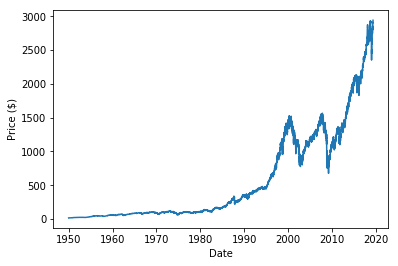

In [7]:
plt.plot(np.array(df_sp500['Date']), np.array(df_sp500['Close']))
plt.xlabel("Date")
plt.ylabel('Price ($)')

From this graph we can see that this stock has grown over time. This makes sense since the economy has grown since the 1950s and the value of the companies that this stock measures has grown since then as well. There a few major dips in the graph which should be represenative of economic crashes. We believe this to be true due the economic crash in 2008 and the represenative fall in the graph at the same time.

# Autocorrelation plot

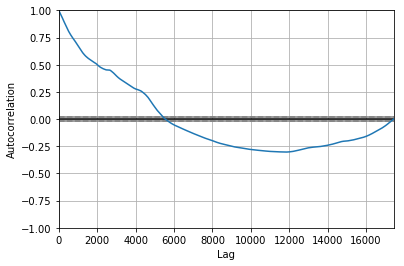

In [8]:
autocorrelation_plot(df_sp500['Close'])

From this autocorrelation plot we can see that with a lag of about 500 - 1000 there is a strong correlation 

# ARIMA modeling

The model is too slow for the full data set so we are going to use a smaller subset of the data

In [14]:
df_sp500_small = df_sp500[16500:]
df_sp500_small = df_sp500_small.set_index("Date")

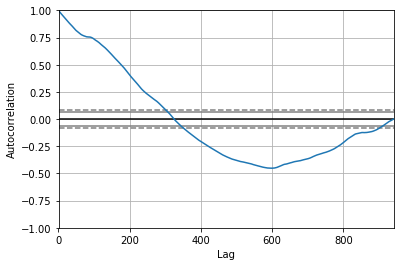

In [15]:
autocorrelation_plot(df_sp500_small['Close'])

In [ ]:
model = ARIMA(df_sp500_small['Close'], order=(100, 1, 0), dates=df_sp500_small.index)
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())